In [3]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras.backend as K

In [4]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=73)


In [5]:
print(data.feature_names)
print(data.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [6]:
class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.constant(gamma)
    
    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='uniform',
                                       trainable=True)
        self.built = True

    def call(self, inputs):
        diff = K.expand_dims(inputs, axis=1) - self.centers
        l2 = K.sum(K.square(diff), axis=-1)
        return K.exp(-self.gamma * l2)


In [7]:
# Build the RBF model
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    RBFLayer(units=10, gamma=0.5),  # RBF Layer
    Dense(1) 
])

rbf_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
rbf_history =rbf_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50


W0000 00:00:1735716562.847785  159554 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.0875 - mse: 5.0875 - val_loss: 2.9199 - val_mse: 2.9199
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6216 - mse: 2.6216 - val_loss: 2.0178 - val_mse: 2.0178
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8253 - mse: 1.8253 - val_loss: 1.5204 - val_mse: 1.5204
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4043 - mse: 1.4043 - val_loss: 1.2569 - val_mse: 1.2569
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1654 - mse: 1.1654 - val_loss: 1.1001 - val_mse: 1.1001
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0372 - mse: 1.0372 - val_loss: 0.9938 - val_mse: 0.9938
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9689 - mse: 0.9689 - val_loss: 0.9180 - val_mse: 0.9180
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8644 - mse: 0.8644 - val_loss: 0.8612 - val_mse: 0.8612
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8099 

In [8]:
# Build the Dense model
dense_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(1)  # Output layer
])

# Compile the Dense model
dense_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the Dense model
dense_history = dense_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))


Epoch 1/50


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8964 - mse: 0.8964 - val_loss: 0.3761 - val_mse: 0.3761
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3485 - mse: 0.3485 - val_loss: 0.3425 - val_mse: 0.3425
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3310 - mse: 0.3310 - val_loss: 0.3143 - val_mse: 0.3143
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2964 - mse: 0.2964 - val_loss: 0.3166 - val_mse: 0.3166
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2981 - mse: 0.2981 - val_loss: 0.3120 - val_mse: 0.3120
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2803 - mse: 0.2803 - val_loss: 0.3214 - val_mse: 0.3214
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2742 - mse: 0.2742 - val_loss: 0.2979 - val_mse: 0.2979
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2745 - mse: 0.2745 - val_loss: 0.2993 - val_mse: 0.2993
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2742 

In [9]:
# Evaluate the RBF model
rbf_loss = rbf_model.evaluate(X_test, y_test, verbose=0)
print(f"RBF Model Loss: {rbf_loss[0]}")
# Evaluate the Dense model
dense_loss = dense_model.evaluate(X_test, y_test, verbose=0)
print(f"Dense Model Loss: {dense_loss[0]}")


RBF Model Loss: 0.5192463397979736


Dense Model Loss: 0.2774643003940582


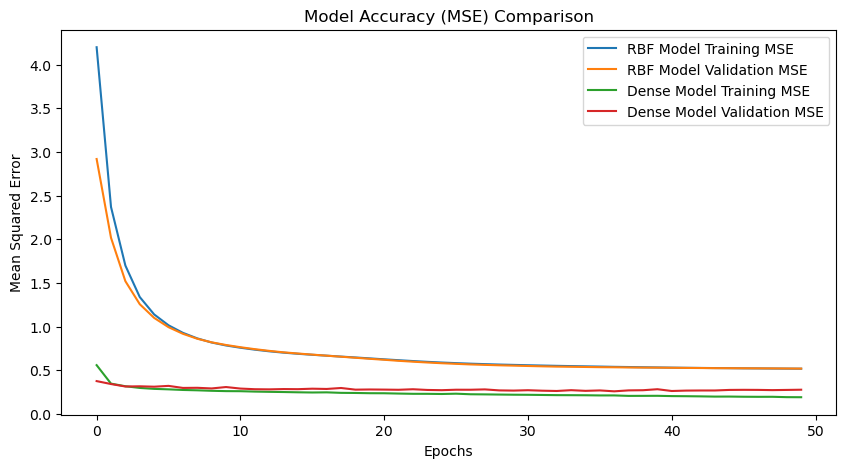

In [13]:
import matplotlib.pyplot as plt

# Plot the loss for both models
plt.figure(figsize=(10, 5))
plt.plot(rbf_history.history['mse'], label='RBF Model Training MSE')
plt.plot(rbf_history.history['val_mse'], label='RBF Model Validation MSE')
plt.plot(dense_history.history['mse'], label='Dense Model Training MSE')
plt.plot(dense_history.history['val_mse'], label='Dense Model Validation MSE')

plt.title('Model Accuracy (MSE) Comparison')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('model_loss_comparison.png')
plt.show()

In [11]:
if rbf_loss[0] < dense_loss[0]:
    print("The RBF model performed better.")
else:
    print("The Dense model performed better.")


The Dense model performed better.


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
 96/129 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
RBF Model Loss: 0.5192463397979736
Dense Model Loss: 0.2774643003940582


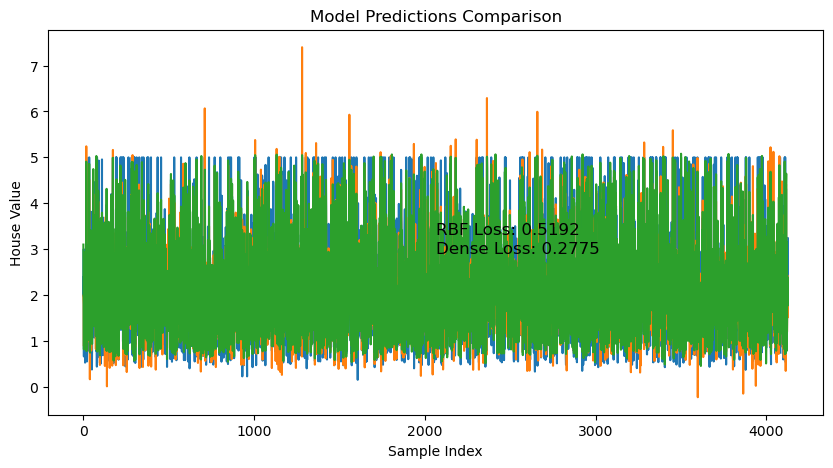

In [15]:
# Evaluate the RBF model on test data
rbf_test_predictions = rbf_model.predict(X_test)
# Evaluate the Dense model on test data
dense_test_predictions = dense_model.predict(X_test)

# Plot the predictions for both models
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Values')
plt.plot(rbf_test_predictions, label='RBF Model Predictions')
plt.plot(dense_test_predictions, label='Dense Model Predictions')
plt.text(0.5, 0.5, f'RBF Loss: {rbf_loss[0]:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.5, 0.45, f'Dense Loss: {dense_loss[0]:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.title('Model Predictions Comparison')
plt.xlabel('Sample Index')
plt.ylabel('House Value')
print("RBF Model Loss:", rbf_loss[0])
print("Dense Model Loss:", dense_loss[0])
plt.savefig('model_predictions_comparison.png')
plt.show()